In [1]:
import random
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Reshape,InputLayer,GlobalAveragePooling2D,DepthwiseConv2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import itertools

In [4]:
import os
#os.chdir('data')
print(os.getcwd())

c:\Users\HP\Documents\GitHub\CNN-ON-FPGA-MSc.-\Training Model(Python)


In [5]:
os.chdir('Dataset')
train_path='train'
test_path='test'
valid_path='valid'
print(train_path)
#os.mkdir('valid')


train


In [4]:
valid_path='valid'

In [6]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path,target_size=(256,256),batch_size=65)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path,target_size=(256,256),batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path,target_size=(256,256),batch_size=30,shuffle=False)


Found 7500 images belonging to 25 classes.
Found 250 images belonging to 25 classes.
Found 1250 images belonging to 25 classes.


In [7]:
mobile=tf.keras.applications.mobilenet.MobileNet()


In [8]:
mobile.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [23]:
for i, layer in enumerate(mobile.layers):
    print(f"Layer {i}: {layer.name}")


Layer 0: input_layer
Layer 1: conv1
Layer 2: conv1_bn
Layer 3: conv1_relu
Layer 4: conv_dw_1
Layer 5: conv_dw_1_bn
Layer 6: conv_dw_1_relu
Layer 7: conv_pw_1
Layer 8: conv_pw_1_bn
Layer 9: conv_pw_1_relu
Layer 10: conv_pad_2
Layer 11: conv_dw_2
Layer 12: conv_dw_2_bn
Layer 13: conv_dw_2_relu
Layer 14: conv_pw_2
Layer 15: conv_pw_2_bn
Layer 16: conv_pw_2_relu
Layer 17: conv_dw_3
Layer 18: conv_dw_3_bn
Layer 19: conv_dw_3_relu
Layer 20: conv_pw_3
Layer 21: conv_pw_3_bn
Layer 22: conv_pw_3_relu
Layer 23: conv_pad_4
Layer 24: conv_dw_4
Layer 25: conv_dw_4_bn
Layer 26: conv_dw_4_relu
Layer 27: conv_pw_4
Layer 28: conv_pw_4_bn
Layer 29: conv_pw_4_relu
Layer 30: conv_dw_5
Layer 31: conv_dw_5_bn
Layer 32: conv_dw_5_relu
Layer 33: conv_pw_5
Layer 34: conv_pw_5_bn
Layer 35: conv_pw_5_relu
Layer 36: conv_pad_6
Layer 37: conv_dw_6
Layer 38: conv_dw_6_bn
Layer 39: conv_dw_6_relu
Layer 40: conv_pw_6
Layer 41: conv_pw_6_bn
Layer 42: conv_pw_6_relu
Layer 43: conv_dw_7
Layer 44: conv_dw_7_bn
Layer 45: 

In [32]:
model=Sequential()
model.add(InputLayer(shape=(256, 256, 3)))



In [33]:
for layer in mobile.layers[1:43]:
     if isinstance(layer, Conv2D):
        
        print(f'Layer {layer.name} is a Conv2D layer with {layer.filters} filters')
        newfilters=(int)(layer.filters/4)
        newlayer=Conv2D(newfilters, layer.kernel_size, strides=layer.strides,
                      padding=layer.padding, activation=layer.activation,
                      use_bias=layer.use_bias, kernel_initializer=layer.kernel_initializer,
                      bias_initializer=layer.bias_initializer)
        model.add(newlayer)
        print(f'Layer {newlayer.name} is a Conv2D layer with {newlayer.filters} filters')
     elif isinstance(layer, BatchNormalization) :
        model.add(BatchNormalization(axis=getattr(layer, 'axis', -1),
    momentum=getattr(layer, 'momentum', 0.99),
    epsilon=getattr(layer, 'epsilon', 1e-3),
    center=getattr(layer, 'center', True),
    scale=getattr(layer, 'scale', True),
    beta_initializer=getattr(layer, 'beta_initializer', 'zeros'),
    gamma_initializer=getattr(layer, 'gamma_initializer', 'ones'),
    moving_mean_initializer=getattr(layer, 'moving_mean_initializer', 'zeros'),
    moving_variance_initializer=getattr(layer, 'moving_variance_initializer', 'ones'),
    beta_regularizer=getattr(layer, 'beta_regularizer', None),
    gamma_regularizer=getattr(layer, 'gamma_regularizer', None),
    beta_constraint=getattr(layer, 'beta_constraint', None),
    gamma_constraint=getattr(layer, 'gamma_constraint', None)))
     elif isinstance(layer,DepthwiseConv2D):
         model.add(DepthwiseConv2D(kernel_size=getattr(layer, 'kernel_size', (3, 3)),
    strides=getattr(layer, 'strides', (1, 1)),
    padding=getattr(layer, 'padding', 'valid'),
    depth_multiplier=getattr(layer, 'depth_multiplier', 1),
    activation=getattr(layer, 'activation', None),
    use_bias=getattr(layer, 'use_bias', True),
    bias_initializer=getattr(layer, 'bias_initializer', 'zeros'),
    depthwise_initializer=getattr(layer, 'depthwise_initializer', 'glorot_uniform')
))
     else:
         model.add(layer)

   

Layer conv1 is a Conv2D layer with 32 filters
Layer conv2d_18 is a Conv2D layer with 8 filters
Layer conv_pw_1 is a Conv2D layer with 64 filters
Layer conv2d_19 is a Conv2D layer with 16 filters
Layer conv_pw_2 is a Conv2D layer with 128 filters
Layer conv2d_20 is a Conv2D layer with 32 filters
Layer conv_pw_3 is a Conv2D layer with 128 filters
Layer conv2d_21 is a Conv2D layer with 32 filters
Layer conv_pw_4 is a Conv2D layer with 256 filters
Layer conv2d_22 is a Conv2D layer with 64 filters
Layer conv_pw_5 is a Conv2D layer with 256 filters
Layer conv2d_23 is a Conv2D layer with 64 filters
Layer conv_pw_6 is a Conv2D layer with 512 filters
Layer conv2d_24 is a Conv2D layer with 128 filters


In [34]:
for layer in mobile.layers[73:86]:
     if isinstance(layer, Conv2D):
        
        print(f'Layer {layer.name} is a Conv2D layer with {layer.filters} filters')
        newfilters=(int)(layer.filters/4)
        newlayer=Conv2D(newfilters, layer.kernel_size, strides=layer.strides,
                      padding=layer.padding, activation=layer.activation,
                      use_bias=layer.use_bias, kernel_initializer=layer.kernel_initializer,
                      bias_initializer=layer.bias_initializer)
        model.add(newlayer)
        print(f'Layer {newlayer.name} is a Conv2D layer with {newlayer.filters} filters')
     elif isinstance(layer, BatchNormalization) :
        model.add(BatchNormalization(axis=getattr(layer, 'axis', -1),
    momentum=getattr(layer, 'momentum', 0.99),
    epsilon=getattr(layer, 'epsilon', 1e-3),
    center=getattr(layer, 'center', True),
    scale=getattr(layer, 'scale', True),
    beta_initializer=getattr(layer, 'beta_initializer', 'zeros'),
    gamma_initializer=getattr(layer, 'gamma_initializer', 'ones'),
    moving_mean_initializer=getattr(layer, 'moving_mean_initializer', 'zeros'),
    moving_variance_initializer=getattr(layer, 'moving_variance_initializer', 'ones'),
    beta_regularizer=getattr(layer, 'beta_regularizer', None),
    gamma_regularizer=getattr(layer, 'gamma_regularizer', None),
    beta_constraint=getattr(layer, 'beta_constraint', None),
    gamma_constraint=getattr(layer, 'gamma_constraint', None)))
     elif isinstance(layer,DepthwiseConv2D):
         model.add(DepthwiseConv2D(kernel_size=getattr(layer, 'kernel_size', (3, 3)),
    strides=getattr(layer, 'strides', (1, 1)),
    padding=getattr(layer, 'padding', 'valid'),
    depth_multiplier=getattr(layer, 'depth_multiplier', 1),
    activation=getattr(layer, 'activation', None),
    use_bias=getattr(layer, 'use_bias', True),
    bias_initializer=getattr(layer, 'bias_initializer', 'zeros'),
    depthwise_initializer=getattr(layer, 'depthwise_initializer', 'glorot_uniform')
))
     else:
         model.add(layer)

   

Layer conv_pw_12 is a Conv2D layer with 1024 filters
Layer conv2d_25 is a Conv2D layer with 256 filters
Layer conv_pw_13 is a Conv2D layer with 1024 filters
Layer conv2d_26 is a Conv2D layer with 256 filters


In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 8)    │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_16             │ (None, 128, 128, 8)    │            72 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 128, 128, 16)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_17             │ (None, 64, 64, 16)     │           144 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 32)     │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_18             │ (None, 64, 64, 32)     │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 32)     │         1,024 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 125,744 (491.19 KB)

 Trainable params: 122,832 (479.81 KB)

 Non-trainable params: 2,912 (11.38 KB)

In [36]:
model.add(GlobalAveragePooling2D())

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 8)    │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_16             │ (None, 128, 128, 8)    │            72 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 128, 128, 16)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_17             │ (None, 64, 64, 16)     │           144 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 32)     │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_18             │ (None, 64, 64, 32)     │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 32)     │         1,024 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 125,744 (491.19 KB)

 Trainable params: 122,832 (479.81 KB)

 Non-trainable params: 2,912 (11.38 KB)

In [38]:
model.add(Dense(units=25,activation='softmax'))

In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 8)    │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_16             │ (None, 128, 128, 8)    │            72 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 128, 128, 16)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_17             │ (None, 64, 64, 16)     │           144 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 32)     │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_18             │ (None, 64, 64, 32)     │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 32)     │         1,024 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 132,169 (516.29 KB)

 Trainable params: 129,257 (504.91 KB)

 Non-trainable params: 2,912 (11.38 KB)

In [40]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])


In [41]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 8)    │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_16             │ (None, 128, 128, 8)    │            72 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 128, 128, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 128, 128, 16)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_17             │ (None, 64, 64, 16)     │           144 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 32)     │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_18             │ (None, 64, 64, 32)     │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 32)     │         1,024 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 132,169 (516.29 KB)

 Trainable params: 129,257 (504.91 KB)

 Non-trainable params: 2,912 (11.38 KB)

In [43]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=5,verbose=2)


Epoch 1/5
116/116 - 202s - 2s/step - accuracy: 0.8375 - loss: 0.4953 - val_accuracy: 0.5120 - val_loss: 2.5450
Epoch 2/5
116/116 - 202s - 2s/step - accuracy: 0.8557 - loss: 0.4489 - val_accuracy: 0.3720 - val_loss: 5.1100
Epoch 3/5
116/116 - 186s - 2s/step - accuracy: 0.8715 - loss: 0.3755 - val_accuracy: 0.4640 - val_loss: 3.4008
Epoch 4/5
116/116 - 179s - 2s/step - accuracy: 0.8771 - loss: 0.3598 - val_accuracy: 0.4760 - val_loss: 3.2190
Epoch 5/5
116/116 - 182s - 2s/step - accuracy: 0.8848 - loss: 0.3383 - val_accuracy: 0.4360 - val_loss: 3.8181


In [45]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=2,verbose=2)


Epoch 1/2
116/116 - 208s - 2s/step - accuracy: 0.9232 - loss: 0.2294 - val_accuracy: 0.5640 - val_loss: 3.1424
Epoch 2/2
116/116 - 188s - 2s/step - accuracy: 0.9255 - loss: 0.2192 - val_accuracy: 0.6240 - val_loss: 1.7504


In [46]:
import matplotlib.pyplot as plt

def plot_conf_matrix(cm,classes,normalize=False,title='confusionmatrix',cmap=plt.cm.Blues):
    plt.imshow(cm,cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')


In [47]:
predictions=model.predict(x=test_batches,verbose=0)
rounded_pred=np.round(predictions)


c:\Users\HP\Documents\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [48]:
from sklearn.metrics import confusion_matrix
test_labels=test_batches.classes
cm=confusion_matrix(y_true=test_labels,y_pred=rounded_pred.argmax(axis=1))
cm_plot_labels=[]
for item in os.listdir('train'):
   cm_plot_labels.append(item)
print(cm_plot_labels)


['airplane', 'airport', 'baseball_diamond', 'basketball_court', 'beach', 'bridge', 'chaparral', 'church', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway', 'golf_course', 'ground_track_field', 'harbor', 'industrial_area', 'intersection', 'island', 'lake', 'meadow', 'medium_residential', 'mobile_home_park']


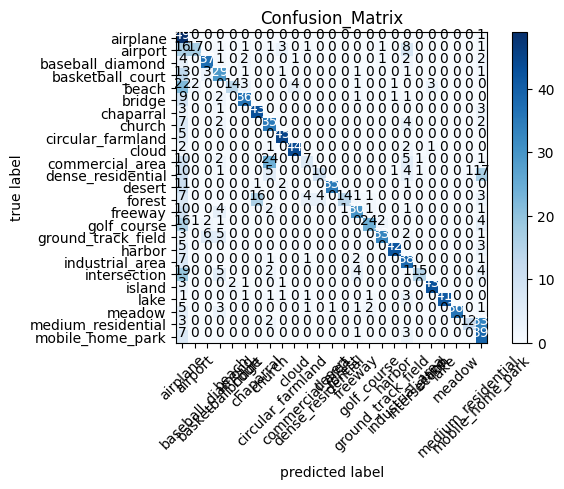

In [49]:
plot_conf_matrix(cm=cm,classes=cm_plot_labels,title='Confusion_Matrix')
